# **Decision Trees**

## Data & Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("penguins.csv")

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE



---
## Eksik Veriler

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [8]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [9]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [10]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [11]:
df[df["sex"] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [12]:
df = df[df["sex"] != "."]

---
## EDA & Görselleştirmeler

In [13]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


<AxesSubplot:xlabel='species', ylabel='count'>

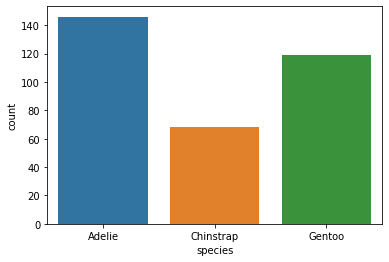

In [14]:
sns.countplot(x="species", data=df)

In [15]:
df["species"].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

<AxesSubplot:xlabel='island', ylabel='count'>

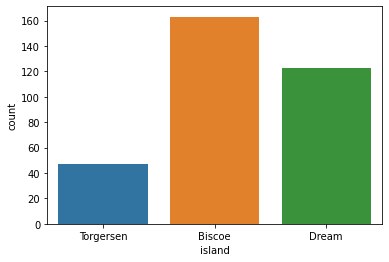

In [16]:
sns.countplot(x="island", data=df)

In [17]:
df["island"].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

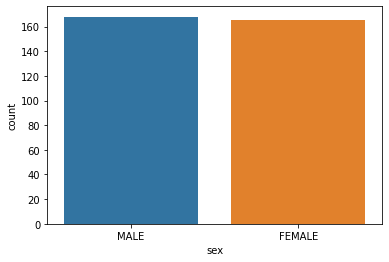

In [18]:
sns.countplot(x="sex", data=df)

In [19]:
df["sex"].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

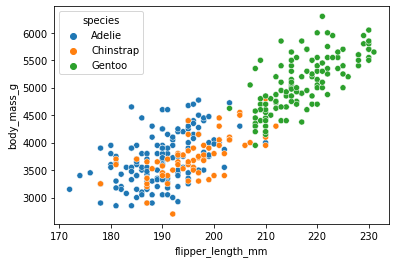

In [20]:
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", data=df, hue="species")

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

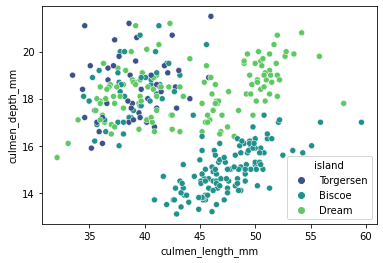

In [21]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='island',palette='viridis')

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

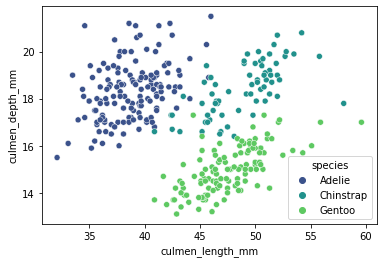

In [22]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='viridis')

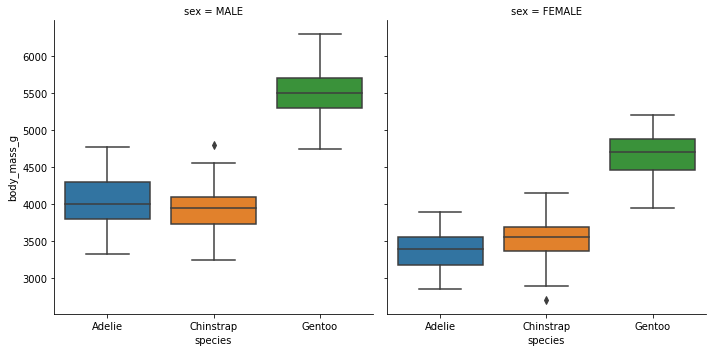

In [23]:
sns.catplot(x="species", y="body_mass_g", data=df, kind="box", col="sex")

<AxesSubplot:xlabel='species', ylabel='culmen_length_mm'>

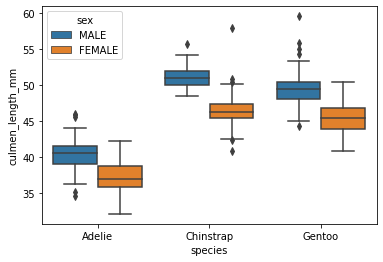

In [24]:
sns.boxplot(x="species", y="culmen_length_mm", data=df, hue="sex")

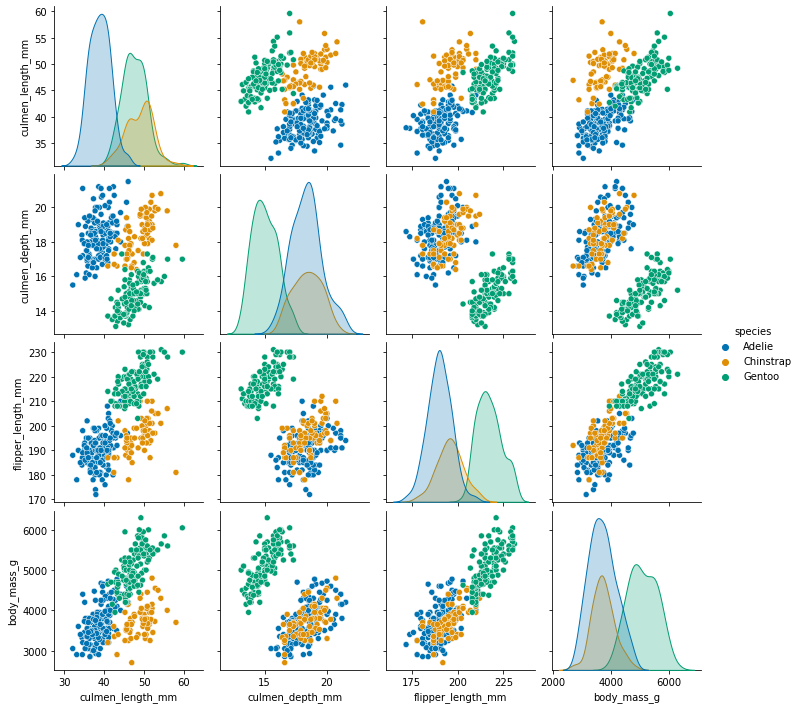

In [25]:
sns.pairplot(df, hue="species", palette="colorblind")

In [26]:
df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228626,0.653096,0.589451
culmen_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<AxesSubplot:>

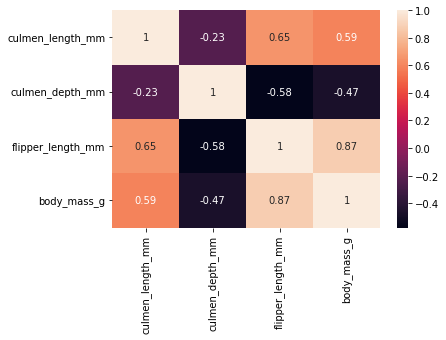

In [28]:
sns.heatmap(df.corr(), annot=True)

---
## Train Test Split

In [ ]:
# pd.get_dummies(df)
# drop_first : https://stackoverflow.com/questions/63661560/drop-first-true-during-dummy-variable-creation-in-pandas
# Multicolinearity'den kaçmak için
pd.get_dummies(df.drop("species", axis= 1), drop_first=True)

* Get Dummies
* Label Encoder 
* One Hot Encoder

In [ ]:
X = pd.get_dummies(df.drop("species", axis= 1), drop_first=True)
y = df["species"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.3, random_state=9)

---
## Karar Verme Ağacı Modeli

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
pengu_pred = model.predict(X_test)

---
## Değerlendirme

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
confusion_matrix(y_test, pengu_pred)

array([[42,  2,  2],
       [ 0, 23,  0],
       [ 0,  0, 31]], dtype=int64)

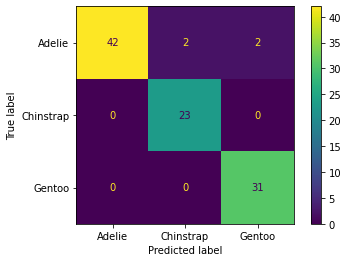

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
# burada prediction değil test verileri üzerinden gözlem yapıyoruz

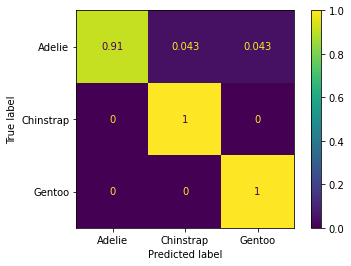

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize="true")

In [ ]:
print(classification_report(y_test, pengu_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.91      0.95        46
   Chinstrap       0.92      1.00      0.96        23
      Gentoo       0.94      1.00      0.97        31

    accuracy                           0.96       100
   macro avg       0.95      0.97      0.96       100
weighted avg       0.96      0.96      0.96       100



In [ ]:
model.feature_importances_

array([0.35848776, 0.04100186, 0.5622097 , 0.        , 0.02930107,
       0.00899961, 0.        ])

In [ ]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=["Özelliklerin Ağırlıkları"])

,Özelliklerin Ağırlıkları
culmen_length_mm,0.358488
culmen_depth_mm,0.041002
flipper_length_mm,0.562210
body_mass_g,0.000000
island_Dream,0.029301
island_Torgersen,0.009000
sex_MALE,0.000000


<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

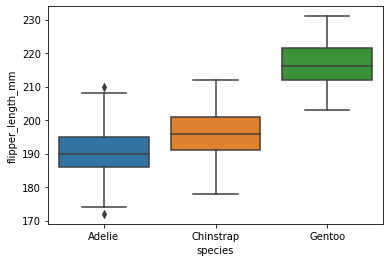

In [ ]:
sns.boxplot(x="species", y="flipper_length_mm",data=df)

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

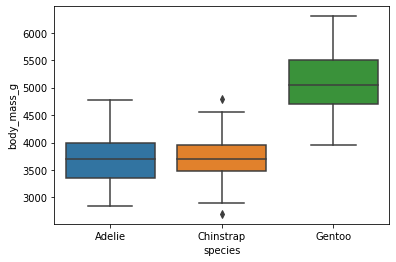

In [ ]:
sns.boxplot(x="species", y="body_mass_g",data=df)

---
## Karar Verme Ağacı

In [ ]:
from sklearn.tree import plot_tree

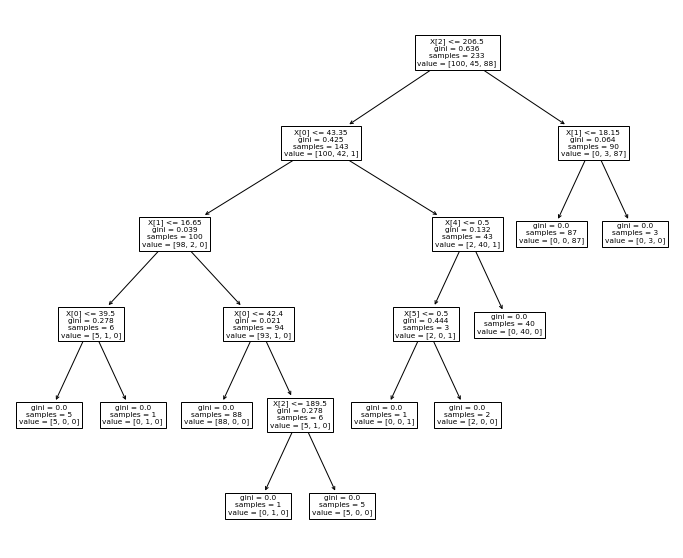

In [ ]:
plt.figure(figsize=(12,10))
plot_tree(model);

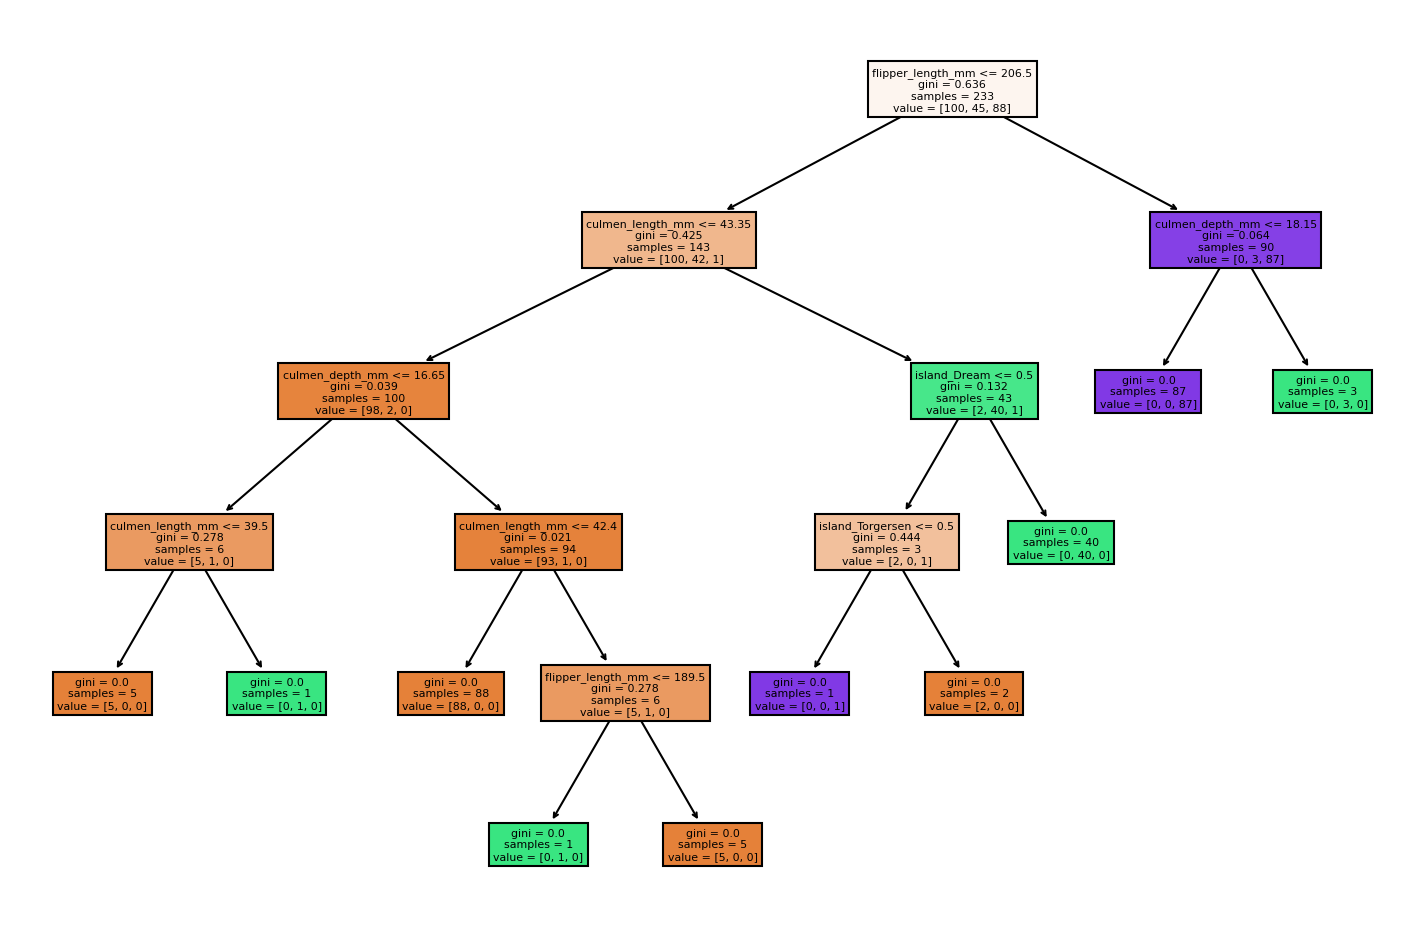

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model, filled=True, feature_names=X.columns);

---
## Model Sonucu için Fonksiyon

In [ ]:
def model_sonuc(model):
    pengu_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    print(classification_report(y_test, pengu_pred),"\n")
    plt.figure(figsize=(12,10), dpi=120)
    plot_tree(model, filled=True, feature_names=X.columns);

---
## Model Parametreleri

### Max Derinlik

In [ ]:
az_agac = DecisionTreeClassifier(max_depth=2)
az_agac.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.93      0.91      0.92        46
   Chinstrap       0.87      0.87      0.87        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100
 



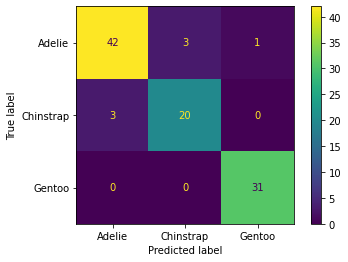

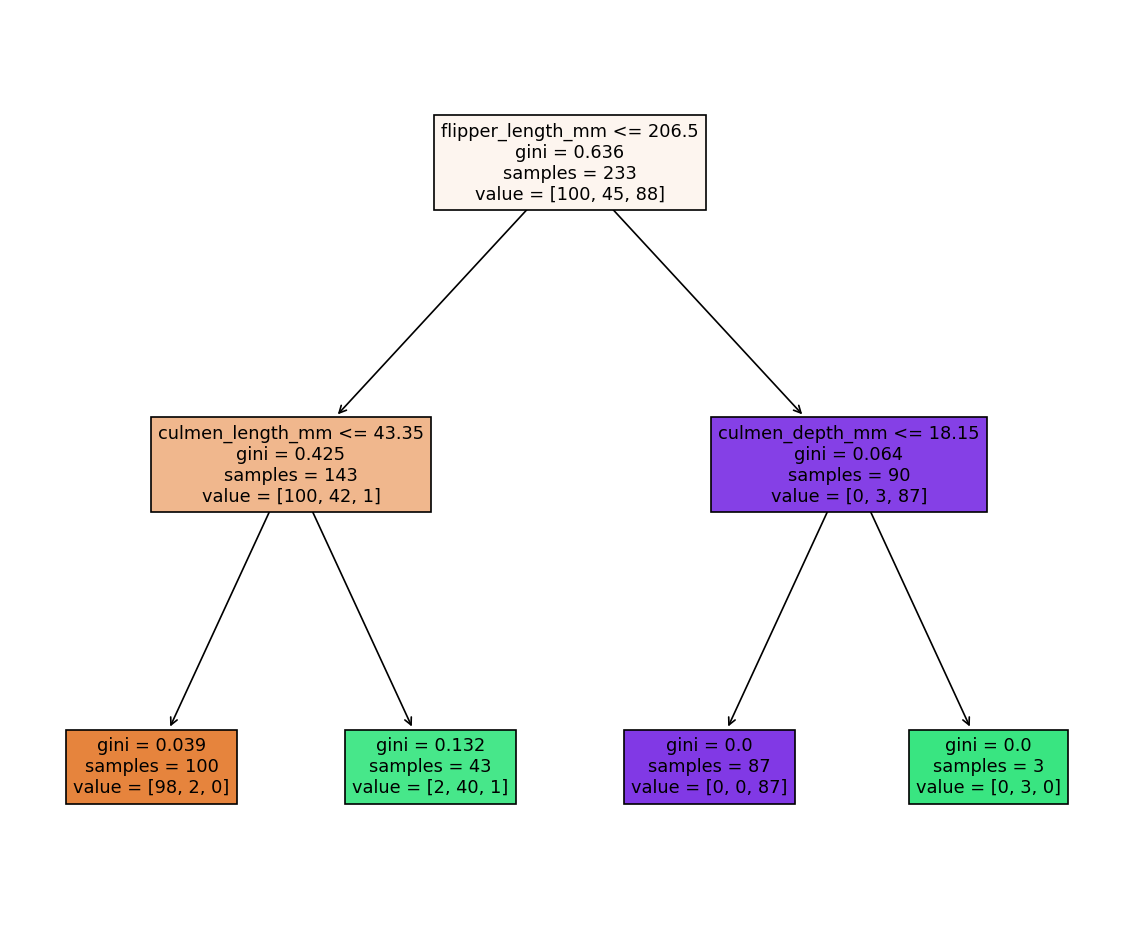

In [ ]:
model_sonuc(az_agac)

### Max Yaprak

In [ ]:
az_yaprak = DecisionTreeClassifier(max_leaf_nodes=3)
az_yaprak.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.93      0.91      0.92        46
   Chinstrap       0.90      0.78      0.84        23
      Gentoo       0.89      1.00      0.94        31

    accuracy                           0.91       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100
 



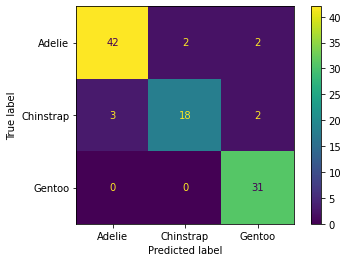

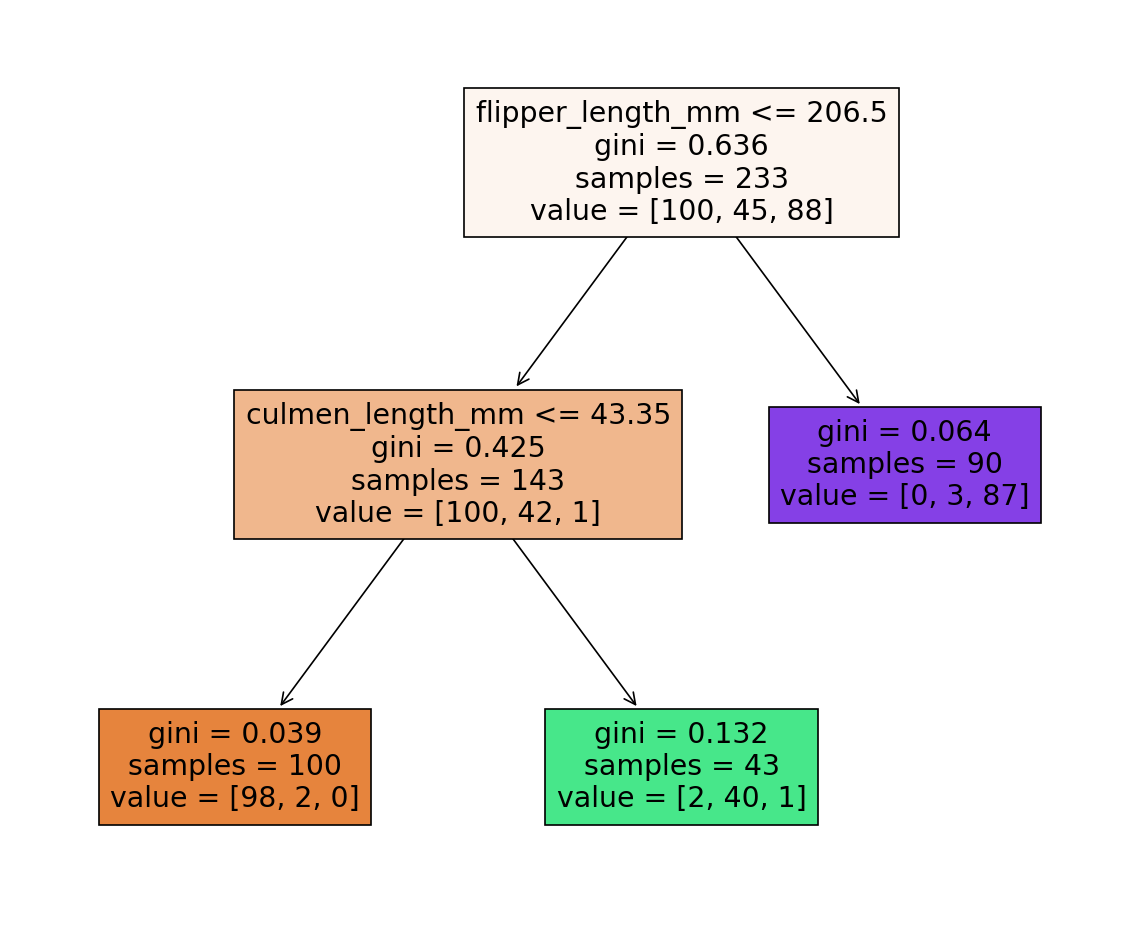

In [ ]:
model_sonuc(az_yaprak)

### Criterion

In [ ]:
entropi = DecisionTreeClassifier(criterion="entropy")
entropi.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        46
   Chinstrap       0.92      1.00      0.96        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100
 



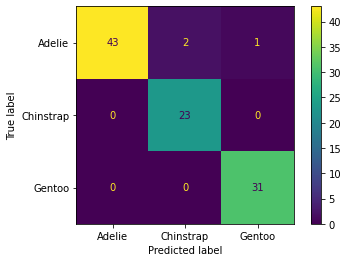

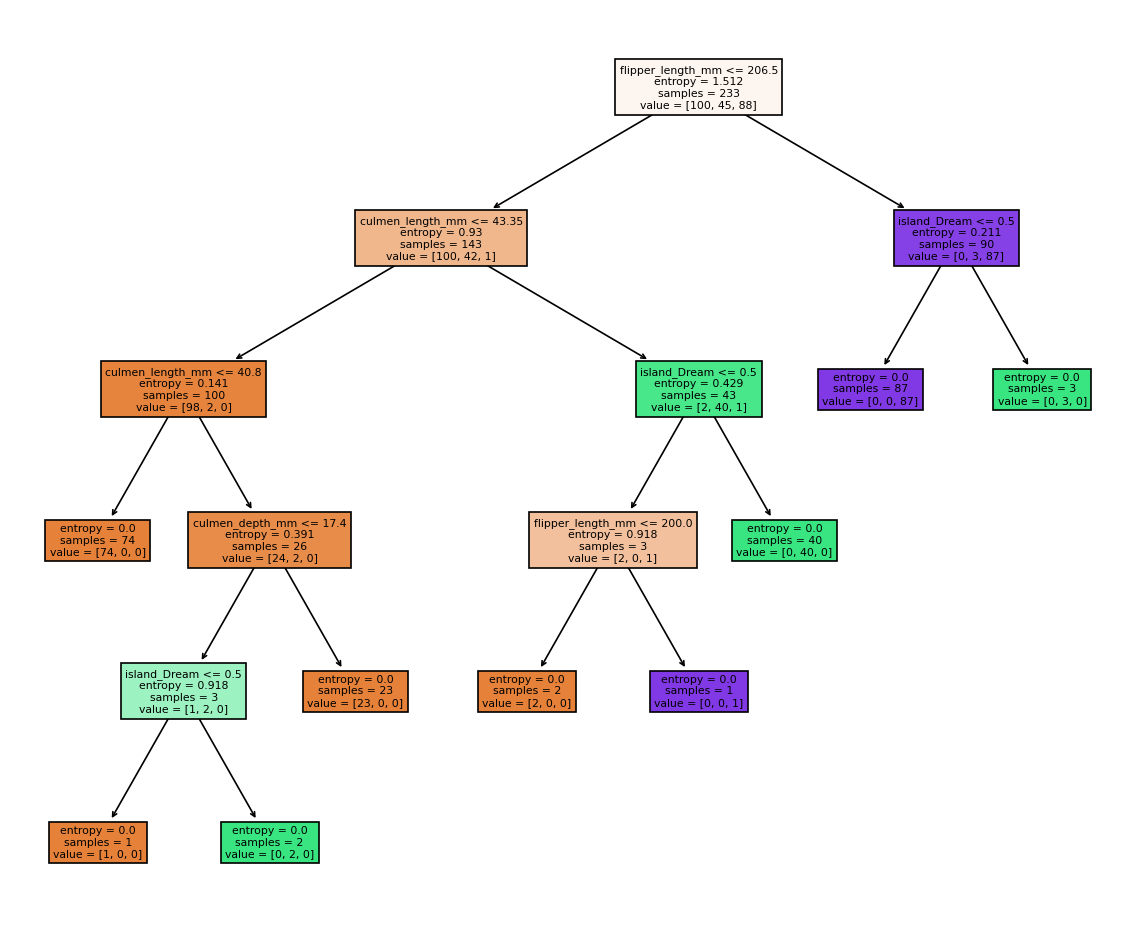

In [ ]:
model_sonuc(entropi)

---
---
# **https://www.youtube.com/watch?v=t7dtzEDmZ34**